In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from demographicmodel import DemographicModel

In [4]:
data_dir = '../fastNeutrino/fitted_params/'
chroms = ['Chr2L', 'Chr2R', 'Chr3L', 'Chr3R']

In [70]:
model_types = ['2EpochConst', '2EpochExp', '3EpochConstConst', '3EpochExpConst', '3EpochConstExp', '3EpochExpExp']
models = {}
for mt in model_types:
    models[mt] = [DemographicModel(data_dir + chrom + '.' + mt + '.txt') for chrom in chroms]

/Users/dpr/mmc_genomics/src/demographicmodel.py:75: RuntimeWarning: overflow encountered in exp
  return n0*np.exp(-(T-t0)*r)


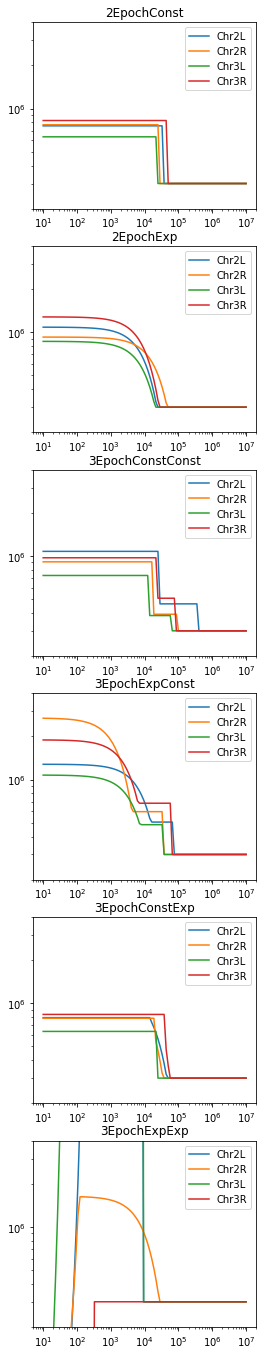

In [71]:
t = np.logspace(1,7,100)
fig = plt.figure(figsize=(4,24))
for i, mt in enumerate(model_types):
    ax = fig.add_subplot(len(model_types), 1, i+1)
    for j, model in enumerate(models[mt]):
        ax.loglog(t, model.population_size(t), label=chroms[j])
    ax.set_title(mt)
    ax.set_ylim([2e5,4e6])
    plt.legend()
